# Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
# plt.style.use(['ieee','no-latex'])

from funcs import *
from stats import *
from Fit import *

# Functions

In [2]:
def H_R(w,tau):
    return w*tau/np.sqrt(1+np.power(w*tau,2))

def H_C(w,tau):
    return 1/np.sqrt(1+np.power(w*tau,2))

def fase_R(w,tau):
    return np.pi/2 + np.arctan(1/(w*tau))

def fase_C(w,tau, a):
    return np.arctan(-w*tau) + a

# RC

In [3]:
if 1:
    path_folder = 'data/RC/'
    V_sgns, V_mths, fase_CH1, fase_MTH = [], [], [], []
    freqs = []
    for i in sorted([int(i) for i in os.listdir(path_folder)]):

        path = path_folder+str(i)+'/'
        V_SGN, V_MTH, dt_CH1, dt_MTH = analize(path, i, False)
        
        V_sgns.append(V_SGN)
        V_mths.append(V_MTH)
        fase_CH1.append(dt_CH1)
        fase_MTH.append(dt_MTH)
        freqs.append(i)

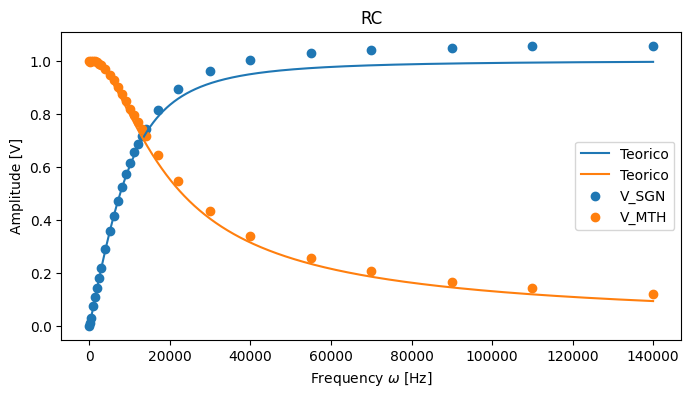

In [4]:
plt.figure(figsize=(8,4))
x = np.linspace(np.min(freqs),np.max(freqs),1000)

plt.plot(x, H_R(x*2*np.pi, 1e3*12e-9), label='Teorico')
plt.plot(x, H_C(x*2*np.pi, 1e3*12e-9), label='Teorico')

plt.scatter(freqs, V_sgns, label='V_SGN')
plt.scatter(freqs, V_mths, label='V_MTH')
plt.title('RC')
plt.xlabel('Frequency $\omega$ [Hz]')
plt.ylabel('Amplitude [V]')
plt.legend()
plt.show()

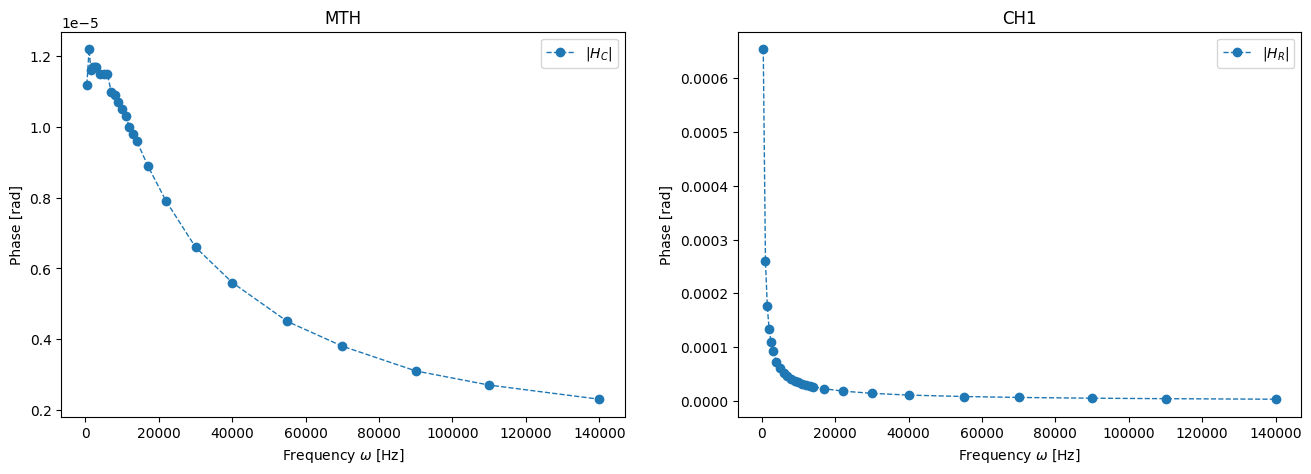

In [5]:
plt.subplots(1,2,figsize=(16,5))
x = np.linspace(np.min(freqs),np.max(freqs),1000)
plt.subplot(1,2,1)
plt.plot(freqs[2:], fase_MTH[2:],'o--', label='$|H_C|$', lw=1)
plt.title('MTH')
plt.xlabel('Frequency $\omega$ [Hz]')
plt.ylabel('Phase [rad]')
plt.legend()

plt.subplot(1,2,2)
plt.plot(freqs[2:], fase_CH1[2:], 'o--', label='$|H_R|$', lw=1)
# plt.plot(x, fase_C(x*2*np.pi, 1e3, 12e-9, 0), label='Teorico')
# plt.plot(x, fase_R(x*2*np.pi, 1e3, 12e-9), label='Teorico')
plt.title('CH1')
plt.xlabel('Frequency $\omega$ [Hz]')
plt.ylabel('Phase [rad]')
plt.legend()
plt.show()

{'tau': 3.872471795827294, 'a': 1.5708026910725188}
{'tau': 0.029337979033893007, 'a': 1.1145483999211924e-06}
0.27412642373637874


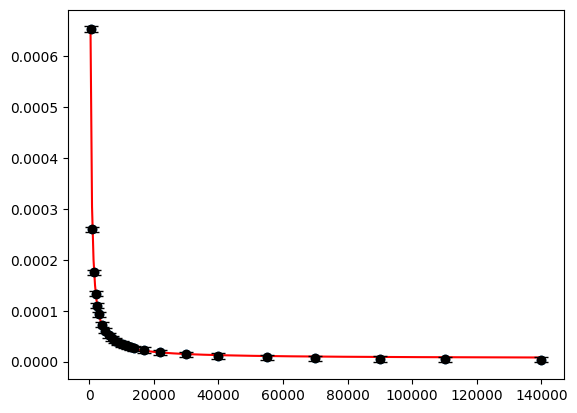

In [19]:
f = Fit(freqs[2:], fase_CH1[2:], fase_C, 0.000005, kwargs={'tau':12e-3, 'a':1.57})
f.fit()
f.visualize()
print(f.values)
print(f.errors)
print(f.fval/f.ndof)